# EDA

## Importación

### Importacion de librerias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
sns.set()

import pandas as pd
import helper

### Importacion de dataset

In [4]:
#steam_games
df_steam_games = pd.read_csv("Dataset/steam_games.csv", encoding='utf-8')
#user_items
df_user_items = pd.read_csv("Dataset/user_items.csv", encoding='utf-8')
#user_reviews
df_user_reviews = pd.read_csv("Dataset/user_reviews.csv", encoding='utf-8')

Verificaremos cada dataframe para posteriormente hacer diferenctes procedimientos y analisis

In [3]:
df_steam_games.head()

,genres,app_name,title,release_date,item_id,developer,Accounting,Action,Adventure,Animation &amp; Modeling,...,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing,sin dato
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,761140.0,Kotoshiro,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,2018-01-04,643980.0,Secret Level SRL,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,670290.0,Poolians.com,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,2017-12-07,767400.0,彼岸领域,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,sin dato,Log Challenge,NaN,NaN,773570.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df_user_items.head()

,item_id,playtime_forever,user_id
0,10,6,76561197970982479
1,20,0,76561197970982479
2,30,7,76561197970982479
3,40,0,76561197970982479
4,50,0,76561197970982479


In [5]:
df_user_reviews.head()

,posted,item_id,recommend,review,user_id
0,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...,76561197970982479
1,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.,76561197970982479
2,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...,js41637
4,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...,js41637


Se puede apreciar que todos los archivos fueron extraidos de forma correcta, pero verificaremos cuantos datos contiene cada dataframe

In [8]:
print("Steam games contiene", df_steam_games.shape[0], " filas")
print("User items contiene", df_user_items.shape[0], " filas ")
print("User Reviews contiene", df_user_reviews.shape[0], " filas")

Steam games contiene 32135  filas
User items contiene 5153209  filas 
User Reviews contiene 59305  filas


## Calidad de datos en Steam Games

### Verificación de nulos

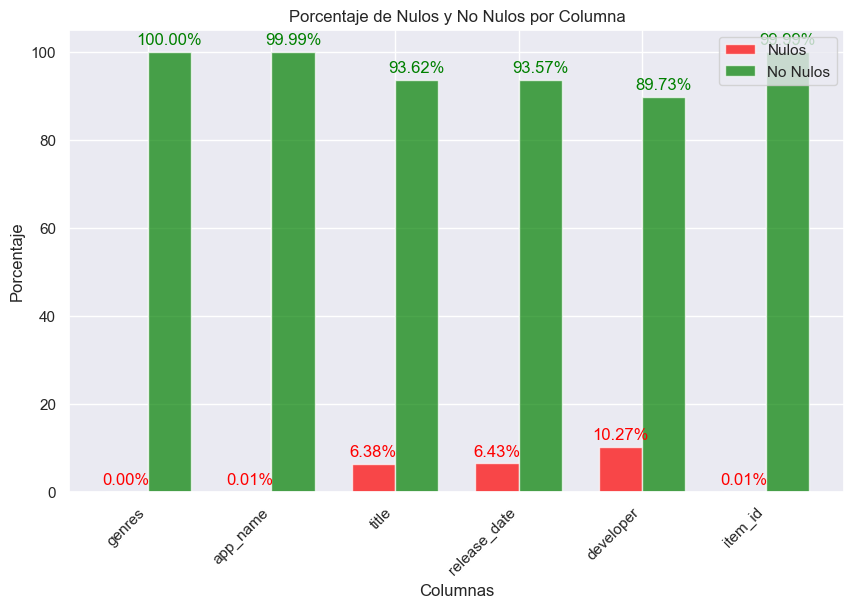

In [5]:
helper.cantidadNulos(df_steam_games,["genres", "app_name", "title", "release_date", "developer", "item_id"])

In [29]:
def contar_nans_en_columna(df, nombre_columna):
    # Contar la cantidad de valores NaN en la columna específica
    cantidad_nans = df[nombre_columna].isna().sum()

    return cantidad_nans
contar_nans_en_columna(df_steam_games, "item_id")

2

En una de las columnas de id se verifica que hay nulo por tanto es importante verificar si son datos con varios datos nulos o si es repetido

### Valores Duplicados por **item_id**

In [23]:
filas_con_duplicados = df_steam_games[df_steam_games.duplicated(subset=['item_id'], keep=False)]
filas_con_duplicados

,genres,app_name,title,release_date,tags,item_id,developer
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13894,['Action'],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,2017-10-26,"['Action', 'FPS', 'Gore', 'Violent', 'Alternat...",612880.0,Machine Games
14573,['Action'],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,2017-10-26,"['Action', 'FPS', 'Gore', 'Violent', 'Alternat...",612880.0,Machine Games
30961,"['Action', 'Adventure']",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,2012-09-07,"['Action', 'Open World', 'Batman', 'Adventure'...",NaN,"Rocksteady Studios,Feral Interactive (Mac)"


El indice 74 no contiene valores en sus columnas, el indice 13894 y el 14573 son contenido duplicados en todos sus columnas  y por ultimo tenemos el ultimo con indice 30961 debemos verificar si este se encuentra anteriormente registrado a traves de una mascara 

In [24]:
df_steam_games[df_steam_games.title == 'Batman: Arkham City - Game of the Year Edition']

,genres,app_name,title,release_date,tags,item_id,developer
1068,"['Action', 'Adventure']",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,2012-09-07,"['Action', 'Open World', 'Batman', 'Adventure'...",200260.0,"Rocksteady Studios,Feral Interactive (Mac)"
30961,"['Action', 'Adventure']",Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,2012-09-07,"['Action', 'Open World', 'Batman', 'Adventure'...",NaN,"Rocksteady Studios,Feral Interactive (Mac)"


Se puede evidenciar a traves de la mascara que el indice 30961 esta repetido

### Tipos de datos

In [9]:
def tipos_de_datos_dataframe(df):
    # Obtener los tipos de datos de cada columna
    tipos_de_datos = df.dtypes

    # Crear un DataFrame para mostrar la información
    tabla_tipos_de_datos = pd.DataFrame({
        'Columna': tipos_de_datos.index,
        'Tipo de Dato': tipos_de_datos.values
    })

    return tabla_tipos_de_datos
tipos_de_datos_dataframe(df_steam_games)

,Columna,Tipo de Dato
0,genres,object
1,app_name,object
2,title,object
3,release_date,object
4,item_id,float64
5,developer,object
6,Accounting,int64
7,Action,int64
8,Adventure,int64
9,Animation &amp; Modeling,int64


Verificamos de cada columna un solo valor

In [40]:
print("app_name -> ",df_steam_games.app_name[0])
print("genres -> ",df_steam_games.genres[0])
print("title -> ",df_steam_games.title[0])
print("release_date -> ",df_steam_games.release_date[0])
print("tags -> ",df_steam_games.tags[0])
print("item_id -> ",df_steam_games.item_id[0])
print("developer -> ",df_steam_games.developer[0])

app_name ->  Lost Summoner Kitty
genres ->  ['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']
title ->  Lost Summoner Kitty
release_date ->  2018-01-04
tags ->  ['Strategy', 'Action', 'Indie', 'Casual', 'Simulation']
item_id ->  761140.0
developer ->  Kotoshiro


podemos observar que app_name, title y developer son string, genres y tags son listas de string y item_id es numerico

### Transformaciones

En el archivo **Feature_engineering.ipynb** se realizaran las transformaciones correspondientes para poder analisis de datos

## Calidad de datos en User Items

### Verificación de nulos

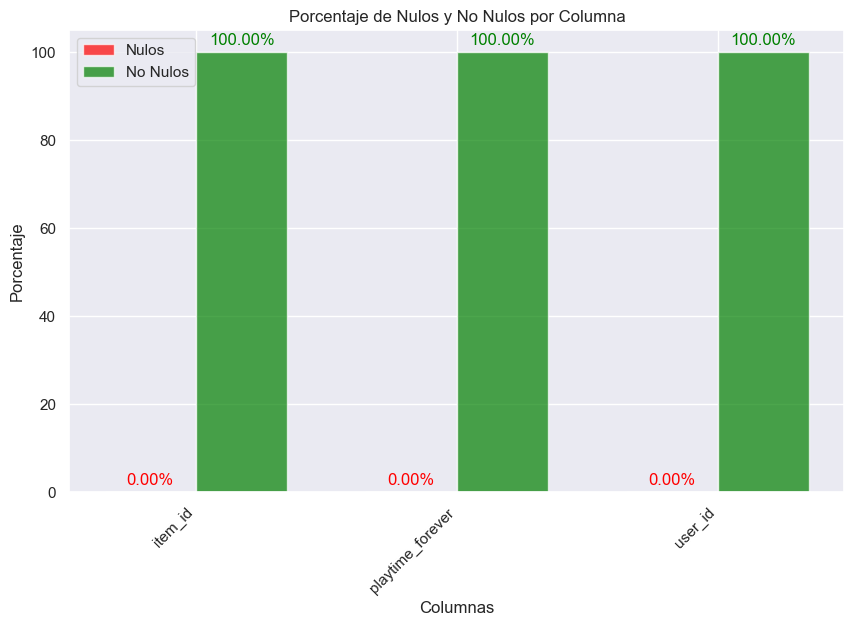

In [7]:
helper.cantidadNulos(df_user_items, ["item_id", "playtime_forever", "user_id"])

Se puede observar que no existen datos nulos en cada columna 

### Verificar Duplicados 

Se puede verificar que no posee nulos en sus campos.
Ahora verificaremos si poseen duplicados en los archivos usando el metodo **duplicated** de pandas

In [8]:
df_duplicados_con_true = df_user_items.duplicated()
solo_filas_duplicadas = df_user_items.loc[df_duplicados_con_true]
solo_filas_duplicadas

,item_id,playtime_forever,user_id
164294,20,5,Nikiad
164295,50,0,Nikiad
164296,70,0,Nikiad
164297,130,0,Nikiad
164298,220,198,Nikiad
...,...,...,...
4898223,213670,725,76561198080057659
4898224,221910,53,76561198080057659
4898225,261030,253,76561198080057659
4898226,273110,0,76561198080057659


Se puede observar que existen 59117 datos repetidos, porque item_id y user_id no pueden repetirse

### Tipos de datos

In [10]:
#verificamos tipops de datos
tipos_de_datos_dataframe(df_user_items)

,Columna,Tipo de Dato
0,item_id,int64
1,playtime_forever,int64
2,user_id,object


Vemos cada dato

In [11]:
print("item_id -> ",df_user_items.item_id[0])
print("playtime_forever -> ",df_user_items.playtime_forever[0])
print("user_id -> ",df_user_items.user_id[0])


item_id ->  10
playtime_forever ->  6
user_id ->  76561197970982479


Se puede observar que item_id y playtime_forever es numerico y user_id tiene que ser de tipo string porque en otros valores estan palabras

### Outliers

In [5]:
#para que no muestre el float como notacion cientifica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
df_user_items['playtime_forever'] = df_user_items['playtime_forever'] / 60
df_user_items.playtime_forever.describe()

count   5153209.000
mean         16.525
std          90.303
min           0.000
25%           0.000
50%           0.567
75%           5.917
max       10712.883
Name: playtime_forever, dtype: float64

En base a las estadísticas descriptivas proporcionadas para la variable en tu conjunto de datos, podemos extraer varias conclusiones:

1. **Cantidad de Observaciones:** El conjunto de datos consta de un total de 5,153,209 observaciones, lo que indica una muestra bastante grande.

2. **Media (Promedio):** La media de la variable es aproximadamente 991.495. Esto sugiere que, en promedio, los valores de la variable se sitúan alrededor de esta cifra.

3. **Desviación Estándar:** La desviación estándar es significativamente alta, aproximadamente 5418.204. Esto indica que hay una considerable dispersión de los valores con respecto a la media. La variabilidad es amplia, y los valores tienden a alejarse de la media en una medida considerable.

4. **Valor Mínimo y Máximo:** El valor mínimo observado es 0, lo que indica la presencia de datos en el conjunto con valores bajos o incluso nulos. El valor máximo es bastante elevado, alcanzando los 642,773, lo que sugiere la existencia de valores atípicos o extremadamente altos en el conjunto.

5. **Cuartiles:** Los cuartiles proporcionan información sobre la distribución de los datos. Por ejemplo, el 25% de los valores son 0 o menos, el 50% son 34 o menos, y el 75% son 355 o menos. Estos cuartiles ayudan a entender la distribución de los datos y la presencia de posibles sesgos.



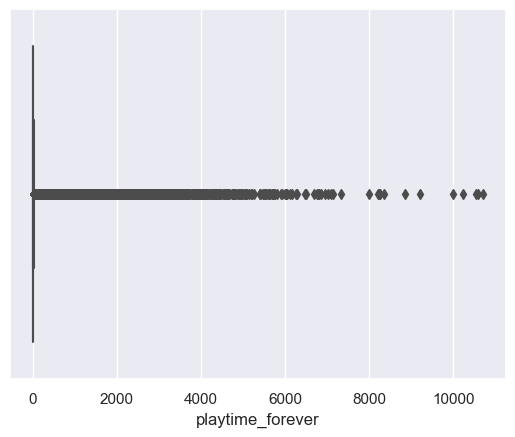

In [11]:
sns.boxplot(x=df_user_items[df_user_items['playtime_forever'] != 0]['playtime_forever'])
plt.show()

### Transformaciones

En el archivo **Feature_engineering.ipynb** se realizaran las transformaciones correspondientes para poder analisis de datos

## Calidad de datos en User Reviews

### Verificación de nulos

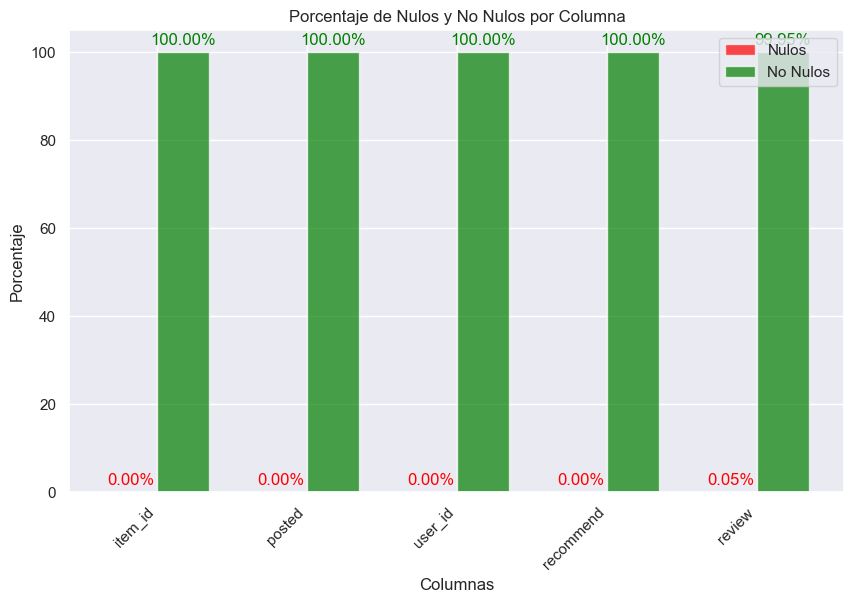

In [12]:
helper.cantidadNulos(df_user_reviews, ["item_id", "posted", "user_id", "recommend", "review"])

En las columnas la mayoria tiene el 100% de datos, excepto review que solo tiene 0,05% de nulo, podemos verificar ese 0,05%

In [13]:
df_user_reviews[df_user_reviews.review.isnull()]

,posted,item_id,recommend,review,user_id
3095,Posted March 11.,550,True,NaN,2ZESTY4ME
4616,"Posted September 19, 2014.",550,True,NaN,76561198093337643
15975,"Posted December 30, 2014.",218620,True,NaN,terencemok
20478,Posted March 10.,378041,True,NaN,76561197971285616
22049,"Posted May 23, 2014.",211820,True,NaN,shez13
22050,"Posted May 23, 2014.",227320,True,NaN,shez13
22910,"Posted September 2, 2014.",620,True,NaN,damo4lyf
23542,"Posted September 9, 2013.",239660,True,NaN,FastAsACheetah
25295,"Posted April 16, 2015.",730,True,NaN,76561198098017317
25300,"Posted March 16, 2013.",570,True,NaN,76561198072940782


### Valores Duplicados 

In [14]:
df_duplicados_con_true = df_user_reviews.duplicated()
solo_filas_duplicadas = df_user_reviews.loc[df_duplicados_con_true]
solo_filas_duplicadas

,posted,item_id,recommend,review,user_id
1112,"Posted September 24, 2015.",346110,True,yep,bokkkbokkk
2891,"Posted January 10, 2014.",218620,True,"Good graphics, fun heists! A bit laggy",ImSeriouss
2892,"Posted January 10, 2014.",105600,True,So fun! DEFINITELY NOT RIP OFF OF MINECRAFT! e...,ImSeriouss
2893,"Posted December 17, 2014.",570,True,bobo pinoy,ImSeriouss
2894,"Posted January 13, 2014.",211820,True,If you want to play this game.. expect glithes...,ImSeriouss
...,...,...,...,...,...
44433,Posted July 3.,422400,True,Muy entretenido y una coleccion de armas prome...,76561198092022514
44434,Posted June 1.,218620,True,"Tiene una jugabilidad y tematica muy buena :D,...",76561198092022514
44435,"Posted August 17, 2014.",261820,True,"Buen juego, no importa el desarrrollo que tien...",76561198092022514
44436,"Posted February 17, 2014.",224260,True,exelente aporte :D¡¡¡ es una buen mod basado e...,76561198092022514


Se puede observar que 874 filas que tienen valores duplicados

### Tipos de datos

In [15]:
#verificamos tipops de datos
tipos_de_datos_dataframe(df_user_reviews)

,Columna,Tipo de Dato
0,posted,object
1,item_id,int64
2,recommend,bool
3,review,object
4,user_id,object


Vemos cada dato

In [16]:
print("posted -> ",df_user_reviews.posted[0])
print("item_id -> ",df_user_reviews.item_id[0])
print("recommend -> ",df_user_reviews.recommend[0])
print("review -> ",df_user_reviews.review[0])
print("user_id -> ",df_user_reviews.user_id[0])

posted ->  Posted November 5, 2011.
item_id ->  1250
recommend ->  True
review ->  Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.
user_id ->  76561197970982479


Se puede observar que item_id es numerico, user_id tiene que ser de tipo string porque en otros valores estan palabras como tambien review en string, en recommend es de tipo booleano y por ultimo posted tenemos que convertirlo a entero extrallendo el año

### Transformaciones

En el archivo **Feature_engineering.ipynb** se realizaran las transformaciones correspondientes para poder analisis de datos

## Graficos Estadisticos

Importamos los archivos limpios

In [26]:
df_steam_games_clean = pd.read_parquet("Dataset/steam_games_clean.parquet")
df_user_items_clean = pd.read_parquet("Dataset/user_items_clean.parquet")
df_user_review_clean = pd.read_parquet("Dataset/user_reviews_clean.parquet")


Se importa y limpia el dt steam_games de nuevo porque este contiene los genres en filas para ayudar de mejor forma en la generacion de graficos

In [43]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#leemos el archivo
df_steam_games1 = pd.read_json('Dataset/output_steam_games.json', lines=True)
# Busca las filas con todas las columnas nulas y las elimina
df_steam_games1 = df_steam_games1.dropna(how='all')
# Reseteamos el index
df_steam_games1 = df_steam_games1.reset_index(drop=True)
#eliminamos columnas
df_steam_games1 = df_steam_games1.drop(["url", "price", "reviews_url",'specs', 'early_access',"tags","publisher", "app_name","title","developer" ], axis=1)
df_steam_games1 = df_steam_games1.rename(columns={'id': 'item_id'})
df_steam_games1 = df_steam_games1.drop([74,14573,30961]).reset_index(drop=True)
df_steam_games1 = df_steam_games1.drop([2579]).reset_index(drop=True)
# Comprobar y manejar los valores nulos en 'release_date'
df_steam_games1['anio'] = pd.to_datetime(df_steam_games1['release_date'], errors='coerce')

# Eliminar filas con valores nulos en 'release_date'
df_steam_games1 = df_steam_games1.dropna(subset=['anio'])

# Extraer el año de 'release_date' y convertir a tipo entero
df_steam_games1['anio'] = df_steam_games1['anio'].dt.year.astype(int)

# Convertir 'item_id' a tipo entero
df_steam_games1['item_id'] = df_steam_games1['item_id'].astype(int)

# Eliminar la columna 'release_date'
df_steam_games1 = df_steam_games1.drop('release_date', axis=1)

# Cambiar el nombre de 'anio' a 'release_date'
df_steam_games1 = df_steam_games1.rename(columns={'anio': 'release_date'})
df_steam_games1['genres'].fillna("sin dato", inplace=True)
df_steam_games1 = df_steam_games1.explode('genres', ignore_index=True)
df_steam_games1

C:\Users\LENOVO..LEGION\AppData\Local\Temp\ipykernel_13584\109665872.py:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_steam_games1['anio'] = pd.to_datetime(df_steam_games1['release_date'], errors='coerce')


,genres,item_id,release_date
0,Action,761140,2018
1,Casual,761140,2018
2,Indie,761140,2018
3,Simulation,761140,2018
4,Strategy,761140,2018
...,...,...,...
72235,Indie,610660,2018
72236,Racing,610660,2018
72237,Simulation,610660,2018
72238,Casual,658870,2017


Veremos la distribucion de los datos del tiempo de juego

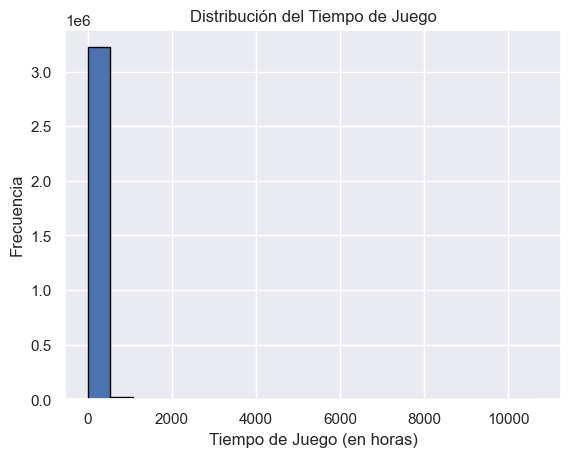

In [28]:

plt.hist(df_user_items_clean['playtime_forever'], bins=20, edgecolor='black')
plt.xlabel('Tiempo de Juego (en horas)')
plt.ylabel('Frecuencia')
plt.title('Distribución del Tiempo de Juego')
plt.show()

Porcentaje de analisis de sentimiento de todo el dataset

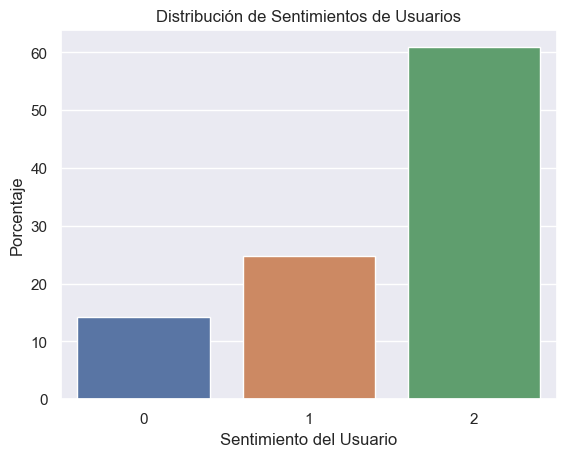

In [33]:

# Calcular las frecuencias
frecuencias = df_user_review_clean['sentiment_analysis'].value_counts()

# Obtener el total de observaciones
total_observaciones = len(df_user_review_clean)

# Calcular las frecuencias en porcentajes
porcentajes = frecuencias / total_observaciones * 100

# Crear el gráfico con porcentajes en el eje y
sns.barplot(x=frecuencias.index, y=porcentajes)
plt.xlabel('Sentimiento del Usuario')
plt.ylabel('Porcentaje')
plt.title('Distribución de Sentimientos de Usuarios')
plt.show()

Se puede evidenciar casi un 15% de malas recomendaciones de los juegos que estan en steam games

Ahora veremos el analisis de sentimiento por cada genero para poder ver cual es el genero el cual suelen ser mas recomendados por las personas

C:\Users\LENOVO..LEGION\AppData\Local\Temp\ipykernel_13584\1501869511.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=pivot_table.reset_index().melt(id_vars='sentiment_analysis'),


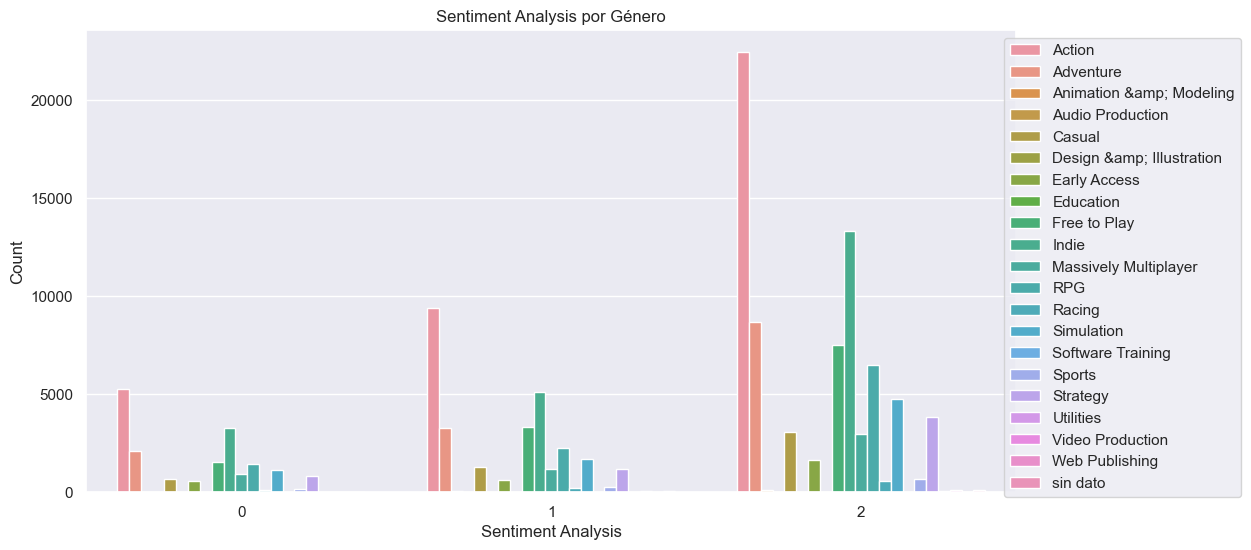

In [45]:
df_combinado2 =pd.merge(df_user_review_clean ,df_steam_games1, on='item_id', how='inner')
# Crear una tabla pivote
pivot_table = df_combinado2.pivot_table(index='sentiment_analysis', columns='genres', aggfunc='size', fill_value=0)


# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=pivot_table.reset_index().melt(id_vars='sentiment_analysis'),
                 x='sentiment_analysis', y='value', hue='genres', ci=None)

plt.xlabel('Sentiment Analysis')
plt.ylabel('Count')
plt.title('Sentiment Analysis por Género')

# Ajustar la ubicación de la leyenda
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

plt.show()

El que entra en cada sentimiento es action el cual es alto en cada barra, aparte se ve patrones en el grafico que cada uno tiene la misma forma

Es importante tambien ver cuales son los mayores generos que se presentan en la plataforma o son desarrollados por los developers

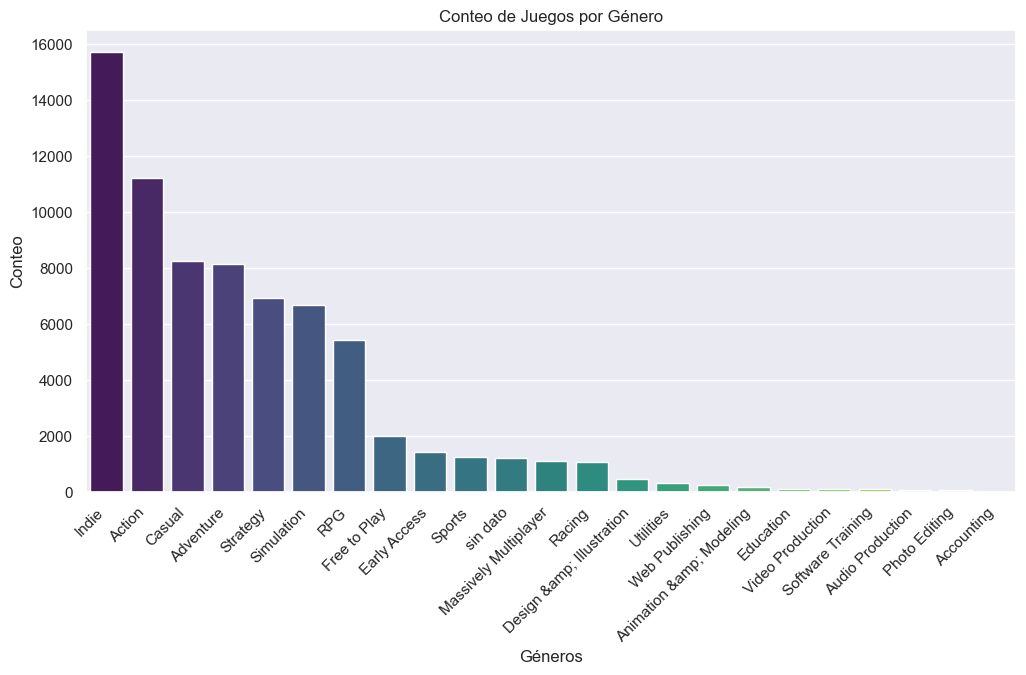

In [46]:
# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x='genres', data=df_steam_games1, order=df_steam_games1['genres'].value_counts().index, palette='viridis')

plt.xlabel('Géneros')
plt.ylabel('Conteo')
plt.title('Conteo de Juegos por Género')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor claridad
plt.show()

La mayor cantidad de genero que se encuentran indie, Action, Casual, Adventure y tambien se ve desde Design estos casi son pocos desarrollados en esta categoria

Desde el año 2005 el tiempo de juego aumento alcanzando puntos demaciados altos en los juego que salieron entre 2010 y 2015

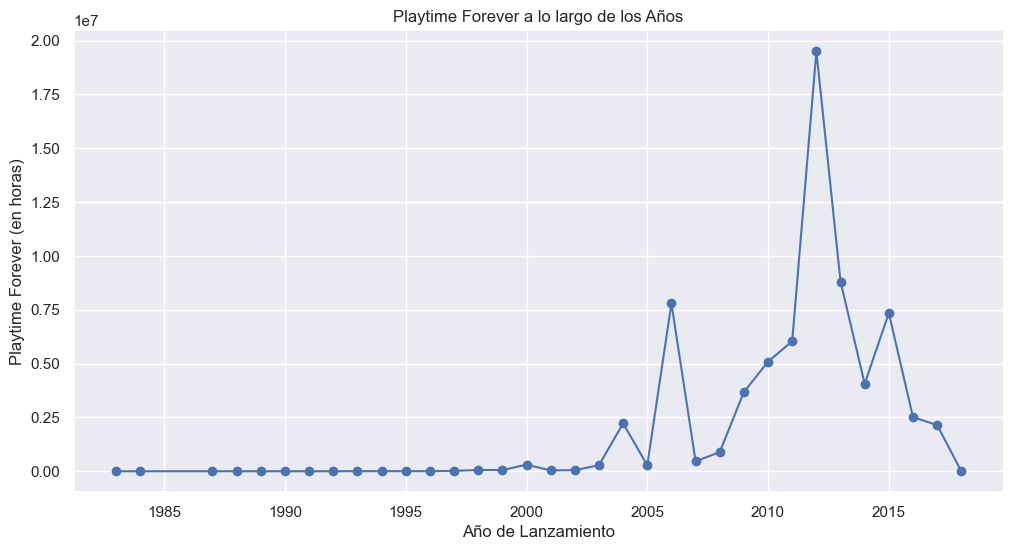

In [47]:
df_release_date_x_user_items = pd.merge(df_steam_games_clean, df_user_items_clean, on='item_id', how='inner')
# Agrupar por release_date y calcular la suma del playtime_forever
df_agrupado4 = df_release_date_x_user_items.groupby('release_date')['playtime_forever'].sum()

# Crear un gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df_agrupado4.index, df_agrupado4.values, marker='o', linestyle='-', color='b')

plt.xlabel('Año de Lanzamiento')
plt.ylabel('Playtime Forever (en horas)')
plt.title('Playtime Forever a lo largo de los Años')
plt.grid(True)
plt.show()

Ahora veremos los desarrolladores que tienen mas juegos en la plataforma steam

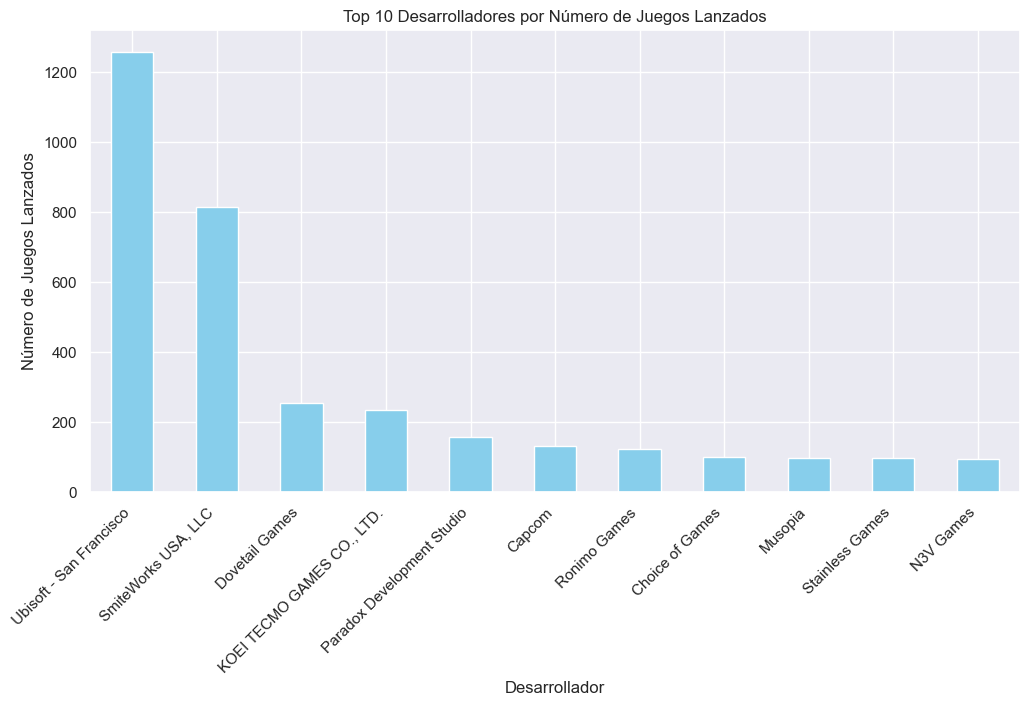

In [50]:
# Obtener el top 10 de desarrolladores con más juegos lanzados
df_steam_games_clean_dev = df_steam_games_clean[df_steam_games_clean['developer'] != "sin dato"]
top_developers_games = df_steam_games_clean_dev['developer'].value_counts().head(11)

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
top_developers_games.plot(kind='bar', color='skyblue')

plt.xlabel('Desarrollador')
plt.ylabel('Número de Juegos Lanzados')
plt.title('Top 10 Desarrolladores por Número de Juegos Lanzados')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

Se puede apreciar que la empresa lider de desarrollo de videojuegos es Ubisoft y smiteWorks  y las demas no tienen una diferencia amplia como estos dos

In [51]:
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 2.3 MB/s eta 0:00:00


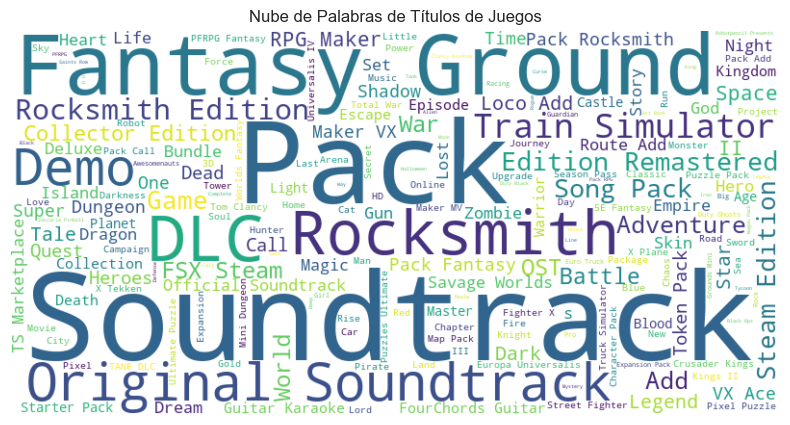

In [52]:
from wordcloud import WordCloud

# Concatenar todos los títulos en una cadena
all_titles = ' '.join(df_steam_games_clean['app_name'].dropna())

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Títulos de Juegos')
plt.show()

La nube de palabras de los titulos de steam nos muestra las palabras mas repetidas las cuales son alrededor de casi 10 plabras

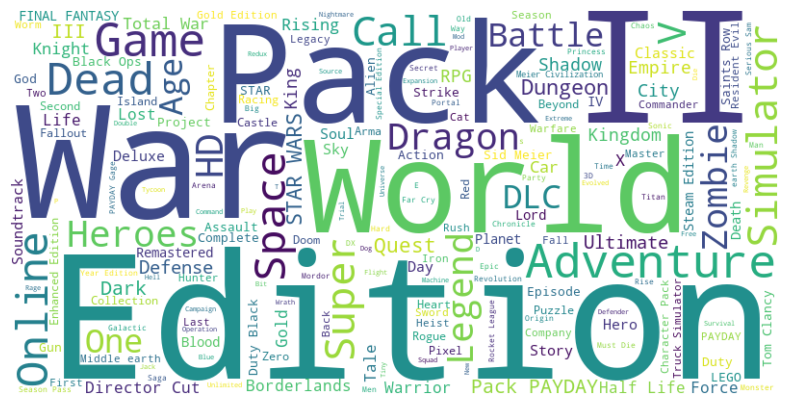

In [53]:
merge_steam_review = pd.merge(df_steam_games_clean, df_user_review_clean[df_user_review_clean.recommend == True], on='item_id', how='inner')
# Obtener los títulos únicos usando groupby
unique_titles = merge_steam_review.groupby('app_name').size().reset_index(name='count')

# Concatenar todos los títulos en un solo string
all_titles = ' '.join(unique_titles['app_name'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Aca podemos identificar las palabras que se repiten mas en juegos recomendados

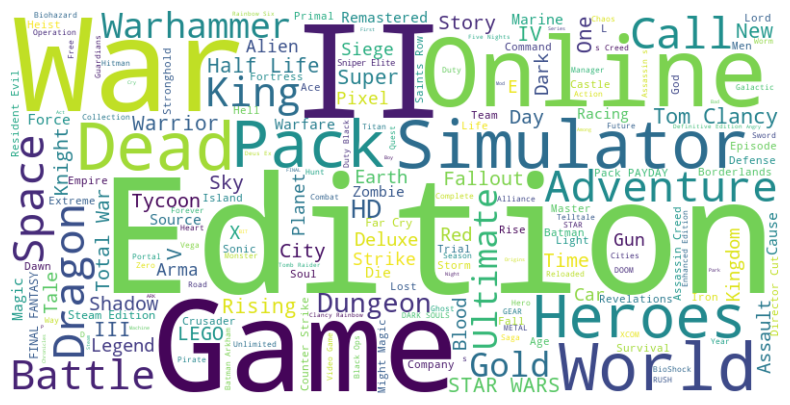

In [54]:
merge_steam_review_norecommend = pd.merge(df_steam_games_clean, df_user_review_clean[df_user_review_clean.recommend == False], on='item_id', how='inner')
# Obtener los títulos únicos usando groupby
unique_titles = merge_steam_review_norecommend.groupby('app_name').size().reset_index(name='count')

# Concatenar todos los títulos en un solo string
all_titles = ' '.join(unique_titles['app_name'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Mostrar la nube de palabras usando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

En este se analiza la nube de palabras en los juego no recomendados